#Análise de Sentimentos com Rede Neural LSTM

💻 [acessar este jupyter notebook no colab](https://colab.research.google.com/drive/1-r_hvPwSFiJliZV4ZUttj7kAWhCFvyOT?usp=sharing)

Análise de sentimentos é a tarefa de identificar e categorizar as emoções ou opiniões expressas em um texto, classificando-as como positivas, negativas ou neutras. Ela permite compreender o sentimento predominante por trás das palavras e avaliações.

**Formas:**
* Positivo, Negativo e Neutro;
* Sentimentos específicos, como furioso, satisfeito, interessado ou não interessado;
* Valor inteiro: de 1 a 10;
* Sistema de estrelas: 1 a 5;

É uma tarefa desafiadora. Por exempelo, um sentimento negativo nem sempre vem expresso através de adjetivos como "*ruim*", "*não gostei*", etc. Ele pode vir como "*A tela deste celular poderia ser maior*".

**Como funciona?**
* Através de Regras pré-definidas ou através de treinamento de ML.

LSTM é uma camada de Long Short-Term Memory (LSTM), que é um tipo de rede neural recorrente (RNN) usada para modelar sequências e dependências de longo prazo.

##Projeto prático de LSTM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np

* Importanto o dataset com tweets para fazer a avaliação de sentimentos.

In [ ]:
from google.colab import files
files.upload()

##Visualização do dataset

In [ ]:
Tweets = pd.read_csv("Tweets.csv")
Tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


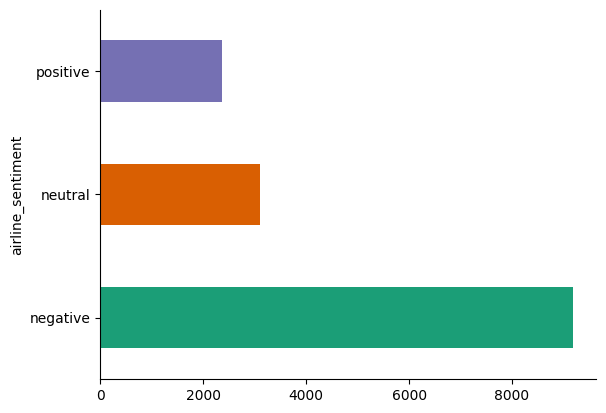

In [ ]:
# @title airline_sentiment

from matplotlib import pyplot as plt
import seaborn as sns
Tweets.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

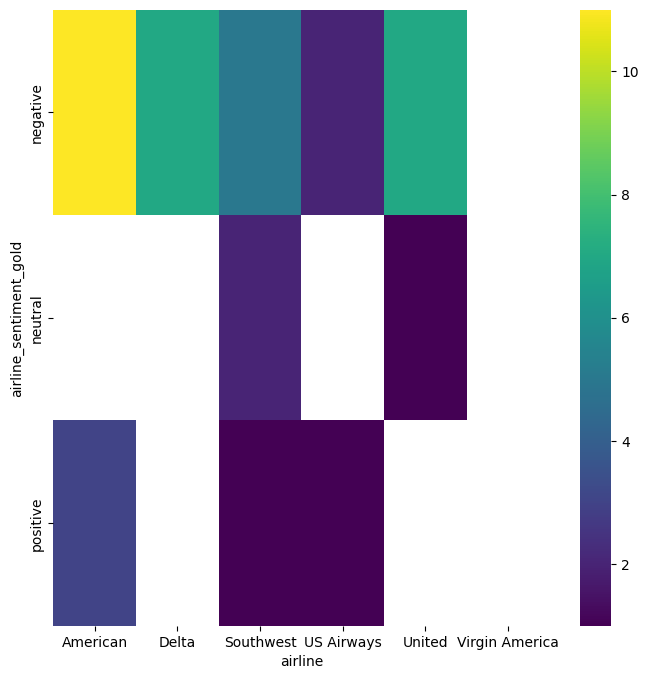

In [ ]:
# @title airline vs airline_sentiment_gold

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['airline_sentiment_gold'].value_counts()
    for x_label, grp in Tweets.groupby('airline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('airline')
_ = plt.ylabel('airline_sentiment_gold')

In [ ]:
Tweets.groupby(['airline_sentiment']).size()

airline_sentiment
negative    9178
neutral     3099
positive    2363
dtype: int64

In [ ]:
Tweets = Tweets[Tweets['airline_sentiment_confidence'] > 0.8]

##Pré-Processamento

O pré-processamento de texto envolve limpar e preparar dados textuais para análise, incluindo etapas como remoção de stop words, tokenização, stemming, lemmatization e normalização de texto para melhorar a eficácia dos modelos de PLN.

###Tokenização de texto

É o processo de dividir um texto em unidades menores chamadas "tokens". Esses tokens podem ser palavras, frases ou até mesmo caracteres, dependendo do objetivo da análise e do modelo de processamento de linguagem natural (PLN) utilizado. A tokenização é uma etapa fundamental no pré-processamento de texto, pois permite que os algoritmos de aprendizado de máquina e processamento de linguagem compreendam e manipulem o texto de maneira eficaz.

In [ ]:
token = Tokenizer(num_words=100)
token.fit_on_texts(Tweets['text'].values)

In [ ]:
X = token.texts_to_sequences(Tweets['text'].values)
X = pad_sequences(X, padding="post", maxlen=100)

In [ ]:
print(X)

[[97 62  0 ...  0  0  0]
 [97 99  1 ...  0  0  0]
 [97  9 99 ...  0  0  0]
 ...
 [13 98 93 ...  0  0  0]
 [13 89  1 ...  0  0  0]
 [13  6 23 ...  0  0  0]]


###One Hot Encoding

É uma técnica de pré-processamento usada em aprendizado de máquina e estatística para converter variáveis categóricas em uma forma que pode ser fornecida a algoritmos de aprendizado. Isso é especialmente útil quando os modelos esperam valores numéricos e as variáveis são categóricas.

In [ ]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(Tweets['airline_sentiment'])
print(y)

[1 0 0 ... 0 1 0]


In [ ]:
y = to_categorical(y)
print(y)

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
X_test

array([[ 8, 76,  6, ...,  0,  0,  0],
       [16, 28,  0, ...,  0,  0,  0],
       [12, 79, 29, ...,  0,  0,  0],
       ...,
       [18, 63, 10, ...,  0,  0,  0],
       [ 8, 46, 42, ...,  0,  0,  0],
       [16, 62, 14, ...,  0,  0,  0]], dtype=int32)

##Rede Neural Artificial

O código abaixo cria uma rede neural sequencial para tarefas de NLP:
* Sequential: é o tipo de modelo mais simples da Keras, onde você pode empilhar camadas uma após a outra.
* Embedding: Esta camada é usada para converter palavras em vetores densos de tamanho fixo.
* SpatialDropout1D: Esta camada aplica dropout ao longo da dimensão temporal dos dados de sequência. Dropout é uma técnica de regularização que ajuda a prevenir overfitting.

LSTM: Esta é uma camada de Long Short-Term Memory (LSTM), que é um tipo de rede neural recorrente (RNN) usada para modelar sequências e dependências de longo prazo. Aqui, está configurada com:

- units=196: número de unidades LSTM.
- dropout=0.2: taxa de dropout aplicada aos inputs.
- recurrent_dropout=0: taxa de dropout aplicada ao estado recorrente.
- activation='tanh': função de ativação para a camada.
- recurrent_activation='sigmoid': função de ativação para a recorrência.
- unroll=False: não desenrola a RNN, útil para pequenas sequências para melhorar a velocidade.
- use_bias=True: utiliza viés na camada.


In [ ]:
modelo = Sequential()
modelo.add(Embedding(input_dim= len(token.word_index), output_dim=128, input_length=X.shape[1]))
modelo.add(SpatialDropout1D(0.2))
modelo.add(LSTM(units=196, dropout=0.2, recurrent_dropout=0, activation='tanh',
                recurrent_activation='sigmoid', unroll=False, use_bias=True))
modelo.add(Dense(units=3,activation="softmax"))

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1638656   
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 128)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 3)                 591       
                                                                 
Total params: 1894047 (7.23 MB)
Trainable params: 1894047 (7.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
#treinamento do modelo
modelo.fit(X_train, y_train, epochs=10, batch_size=30,verbose=True,validation_data=(X_test, y_test))

Epoch 1/10
245/245 [==============================] - 86s 335ms/step - loss: 0.8185 - accuracy: 0.7048 - val_loss: 0.8106 - val_accuracy: 0.7065
Epoch 2/10
245/245 [==============================] - 72s 295ms/step - loss: 0.8119 - accuracy: 0.7069 - val_loss: 0.8232 - val_accuracy: 0.7065
Epoch 3/10
245/245 [==============================] - 75s 307ms/step - loss: 0.8109 - accuracy: 0.7069 - val_loss: 0.8167 - val_accuracy: 0.7065
Epoch 4/10
245/245 [==============================] - 82s 333ms/step - loss: 0.8111 - accuracy: 0.7069 - val_loss: 0.8088 - val_accuracy: 0.7065
Epoch 5/10
245/245 [==============================] - 76s 309ms/step - loss: 0.8113 - accuracy: 0.7069 - val_loss: 0.8097 - val_accuracy: 0.7065
Epoch 6/10
245/245 [==============================] - 77s 314ms/step - loss: 0.8096 - accuracy: 0.7069 - val_loss: 0.8121 - val_accuracy: 0.7065
Epoch 7/10
245/245 [==============================] - 78s 318ms/step - loss: 0.8105 - accuracy: 0.7069 - val_loss: 0.8106 - val_ac

In [ ]:
loss, accuracy = modelo.evaluate(X_test,y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

99/99 [==============================] - 16s 159ms/step - loss: 0.8092 - accuracy: 0.7065
Loss:  0.8091682195663452
Accuracy:  0.7065009474754333


In [ ]:
prev = modelo.predict(X_test)
print(prev)

99/99 [==============================] - 10s 96ms/step
[[0.713703   0.14563584 0.14066122]
 [0.713703   0.14563584 0.14066122]
 [0.713703   0.14563584 0.14066122]
 ...
 [0.7137029  0.14563584 0.14066121]
 [0.7137029  0.14563584 0.14066121]
 [0.713703   0.14563584 0.14066122]]
